# Checking for leap year

In [1]:
def is_leap(year: int) -> bool:
    """
    Checks if a given year is leap year or not.

    ARGUMENTS:
    year -> check if this year is a leap year

    RETURNS:
    TRUE if leap year, FALSE otherwise
    """

    if year % 4 != 0:
        # year is not divisible by 4 -> common year
        return False
    elif year % 100 == 0 and year % 400 != 0:
        # year is divisible by 4 and 100 but not by 400 -> common year
        return False
    elif year % 3200 == 0:
        # Not widely accepted case
        # skip leap year every 3200 years
        return False
    else:
        # year is divisible by 4 -> (100 and 400) -> ~3200 -> leap year
        return True

In [2]:
years = [2024, 2023, 2022, 2021, 2020, 2000, 1996, 1900, 1600, 300, 3200, 6400]

for year in years:
    if is_leap(year):
        print(f"{year:04} is a leap year.")
    else:
        print(f"{year:04} is a common year.")

2024 is a leap year.
2023 is a common year.
2022 is a common year.
2021 is a common year.
2020 is a leap year.
2000 is a leap year.
1996 is a leap year.
1900 is a common year.
1600 is a leap year.
0300 is a common year.
3200 is a common year.
6400 is a common year.


# Zeller's Congruence
### This function calculates day of any given date

In [3]:
def day_on(day_of_month: int, month: int, year: int) -> int:
    """
    Calculates ISO day of the week for a given date using Zeller's Congruence.

    ARGUMENTS:
    day_of_month -> date for which the day of week is to be calculated.
    month -> given month
    year -> given year

    RETURNS:
    an integer [1, 7] inclusive of 1 and 7, where every number relates to Mon - Sun in that order.
    """
    
    if month == 1 or month == 2:
        # if JAN or FEB, decrease year by 1 and add 12 to month value
        month += 12
        year -= 1
    year_of_century = year % 100
    zero_based_century = year // 100
    
    # Congruence equation
    day_of_week = (day_of_month
                   + (13 * (month + 1)) // 5
                   + year_of_century
                   + year_of_century // 4
                   + zero_based_century // 4
                   - 2 * zero_based_century
                  ) % 7
    return ((day_of_week + 5) % 7) + 1 # convert to ISO format and return

In [4]:
day_map = {1: "Monday",
           2: "Tuesday",
           3: "Wednesday",
           4: "Thursday",
           5: "Friday",
           6: "Saturday",
           7: "Sunday"
          }
# assertion case
day_map[day_on(5, 2, 2019)]

'Tuesday'

In [5]:
# date format: [day, month, year]
dates = [[29, 2, 2016], [9, 2, 2024], [13, 7, 2020], [1, 8, 1996]]
for date in dates:
    day = day_on(date[0], 
                 date[1], 
                 date[2]
                )
    print(f"Day of the week on {date[0]:02}/{date[1]:02}/{date[2]:04}: {day_map[day]}")

Day of the week on 29/02/2016: Monday
Day of the week on 09/02/2024: Friday
Day of the week on 13/07/2020: Monday
Day of the week on 01/08/1996: Thursday


# Print calendar of the year

In [6]:
month_map = {1: ["Jan", 31], 2: ["Feb", 28], 3: ["Mar", 31], 4: ["Apr", 30],
             5: ["May", 31], 6: ["Jun", 30], 7: ["Jul", 31], 8: ["Aug", 31],
             9: ["Sep", 30], 10: ["Oct", 31], 11: ["Nov", 30], 12: ["Dec", 31]
            }

In [7]:
def calendar_of_year(year: int, month_map:dict = month_map) -> None:
    """
    This function repeatedly calls print_calendar function to print calendar for each month.
    
    ARGUMENTS:
    year -> print calendar of this year
    month_map -> gives numeric value to months and with total number of days in that specific month

    RETURNS:
    NONE
    """

    if is_leap(year):
        # if leap year, change number of days in February
        month_map[2][1] = 29
    
    for n, month in month_map.items():
        # get the day of the week on which the month starts
        start_of_month = day_on(1, n, year)
        # call print_calendar function for the month
        print_calendar(start_of_month, month[0], month[1], year)


def print_calendar(start_of_month: int, month_name: str, end_date: int, year: int) -> None:
    """
    This function prints calendar of a given month and year.

    ARGUMENTS:
    start_of_month -> the day of the week on which the month begin.
    month_name -> name of the month.
    end_date -> number of days in that month.
    year -> year for which the calendar is being prints.

    RETURNS:
    NONE
    """
    # date starts from 1
    curr = 1 
    # print heading and subheading
    print(f"{month_name:>12} {year}\n")
    print(f"Mon Tue Wed Thu Fri Sat Sun\n")

    # loop through days per week of a month
    for i in range(6):
        # printing weeks
        
        print(" ", end="")
        for j in range(1, 8):
            # printing dates of a week
            
            if curr > end_date:
                # if current date is greater than end date of month, stop printing
                break
            if i == 0 and j >= start_of_month:
                # for first week, find where to start printing dates
                print(f"{curr:02}  ", end = "")
                curr += 1
            elif i == 0 and j < start_of_month:
                # insert bland spaces before start date of first week
                print(f"{' ':4}", end = "")
            elif i != 0:
                # print dates for every other week
                print(f"{curr:02}  ", end = "")
                curr += 1
        print(f"\n")

In [8]:
# sanity check
print_calendar(4, "Feb", 29, 2024)

         Feb 2024

Mon Tue Wed Thu Fri Sat Sun

             01  02  03  04  

 05  06  07  08  09  10  11  

 12  13  14  15  16  17  18  

 19  20  21  22  23  24  25  

 26  27  28  29  

 



In [9]:
calendar_of_year(2024)

         Jan 2024

Mon Tue Wed Thu Fri Sat Sun

 01  02  03  04  05  06  07  

 08  09  10  11  12  13  14  

 15  16  17  18  19  20  21  

 22  23  24  25  26  27  28  

 29  30  31  

 

         Feb 2024

Mon Tue Wed Thu Fri Sat Sun

             01  02  03  04  

 05  06  07  08  09  10  11  

 12  13  14  15  16  17  18  

 19  20  21  22  23  24  25  

 26  27  28  29  

 

         Mar 2024

Mon Tue Wed Thu Fri Sat Sun

                 01  02  03  

 04  05  06  07  08  09  10  

 11  12  13  14  15  16  17  

 18  19  20  21  22  23  24  

 25  26  27  28  29  30  31  

 

         Apr 2024

Mon Tue Wed Thu Fri Sat Sun

 01  02  03  04  05  06  07  

 08  09  10  11  12  13  14  

 15  16  17  18  19  20  21  

 22  23  24  25  26  27  28  

 29  30  

 

         May 2024

Mon Tue Wed Thu Fri Sat Sun

         01  02  03  04  05  

 06  07  08  09  10  11  12  

 13  14  15  16  17  18  19  

 20  21  22  23  24  25  26  

 27  28  29  30  31  

 

         Jun 2024

Mon Tue

# Linear Algebra

In [10]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# matrices
A = np.array([[2, -1],
              [-1, 2]]
            )
B = np.array([0, 3]).T

Method 1: Solving for X using NumPy solver

In [12]:
X = np.linalg.solve(A, B)
X

array([1., 2.])

Method 2: Solving for X using inverse of A: X = A_inv @ B

In [13]:
X = np.linalg.inv(A) @ B
X

array([1., 2.])

In [14]:
# Sanity check
A @ X == B

array([ True,  True])

Given X, solve for B using linear combination of column vectors of matrix A

In [15]:
def linear_combo(A: np.array([]), X: np.array([])) -> None:
    """
    Calculates linear combination of A scaled by X
    
    PARAMETERS:
    A -> 2x2 matrix
    X -> 1x2 vector
    
    RETURNS:
    NONE
    """
    return np.array([X[0] * A[:,0] + X[1] * A[:, 1]]).squeeze()

In [16]:
# Sanity check
linear_combo(A, X) == B 

array([ True,  True])

In [17]:
def plot_combo(A: np.array([]), X: np.array([])) -> None:
    """
    Plots linear combination of A scaled by X
    
    PARAMETERS:
    A -> 2x2 matrix
    X -> 1x2 vector
    
    RETURNS:
    NONE
    """
    
    plt.figure(figsize=(7, 5))
    linear_comb = linear_combo(A, X)
    
    scaled_ax0 = np.array([X[0] * A[0, 0], X[0] * A[1, 0]])
    scaled_ax1 = np.array([X[1] * A[0, 1], X[1] * A[1, 1]])
    
    plt.plot([0, A[0,0]], 
             [0, A[1, 0]], 
             c="blue", 
             label="AV1 vector"
            )
    plt.plot([0, A[0,1]], 
             [0, A[1, 1]], 
             c="green", 
             label="AV2 vector"
            )
    plt.plot([0, scaled_ax0[0]], 
             [0, scaled_ax0[1]], 
             c="black", 
             label="AV1 vector scaled by X0"
            )
    plt.plot(np.array([0, scaled_ax1[0]]) + scaled_ax0[0], 
             np.array([0, scaled_ax1[1]]) + scaled_ax0[1], 
             c="yellow", 
             label="AV2 vector scaled by X1"
            )
    plt.plot([0, linear_comb[0]], 
             [0, linear_comb[1]], 
             c="red", 
             label="Linear Combination"
            )
    
    plt.legend()
    plt.grid()
    plt.show()

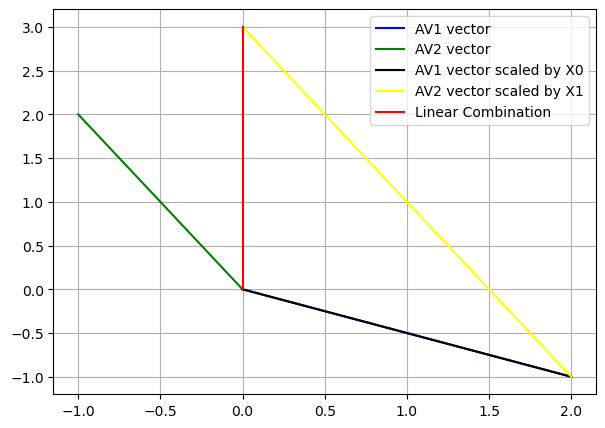

In [18]:
plot_combo(A, X)

In [19]:
def custom_solver(A: np.array([]), B: np.array([])) -> None:
    """
    Solves AX = B for X and plots linear combination graph
    
    PARAMETERS:
    A -> 2x2 matrix
    B -> 1x2 solution vector
    
    RETURNS:
    NONE
    """
    X = np.linalg.solve(A, B)
    plot_combo(A, X)

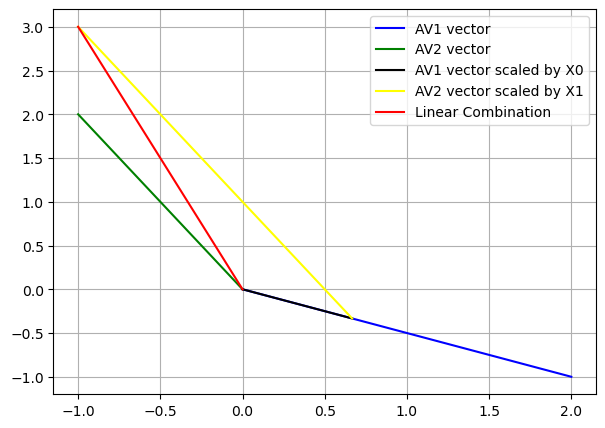

In [20]:
# example in the Lab sheet
new_B = [-1, 3]
custom_solver(A, new_B)

# Probability and Statistics

In [21]:
# import dependencies
import random

In [22]:
def Binomial(n: int, p: float) -> int:
    """
    Conducts n number of trials with p probability of success
    where success is the measures of drawning a ball of desired 
    color from the bag.

    ARGUMENTS:
    n -> Number of times the ball needs to be drawn with replacement
    p -> Probability of drawning the right ball.

    RETURNS:
    number of success or number of times the right ball was drawn from the bag
    """
    success = 0
    c = random.randint(1, 101)
    for i in range(n):
        draw_prob = random.randint(1, 101)
        if draw_prob < p * 100:
            success += 1
    return success    

In [23]:
def histogram(n: int, p: float, trials: int) -> None:
    """
    Plots histogram of the number of success in each trial.

    ARGUMENTS:
    n -> Number of times the ball needs to be drawn with replacement
    p -> Probability of drawning the right ball.
    trials -> Number of trials to be conducted.

    RETURNS:
    NONE
    """
    results = [Binomial(n, p) for _ in range(trials)]
    plt.hist(results, bins=range(n+2), align="left")
    plt.xlabel("Number of Success")
    plt.ylabel("Frequency")
    plt.title(f"Binomial Distribution of {trials} trials, n={n}, p={p}")
    plt.show()

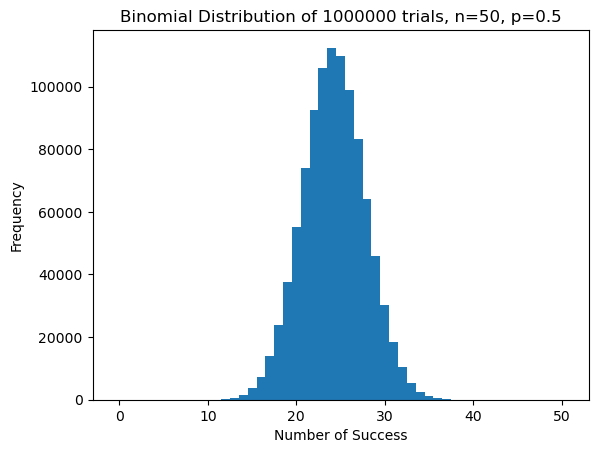

In [24]:
# sanity check
histogram(50, 0.5, 1000000)

In [25]:
n = 10
p = 0.7
NUM_TRIALS = 10000

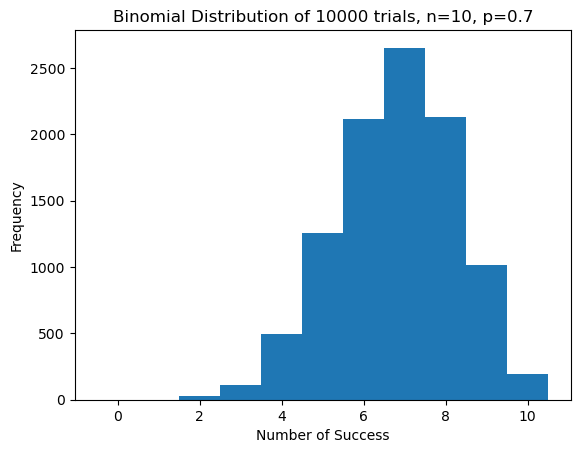

In [26]:
# call histogram function to plot the distribution
histogram(n, p, NUM_TRIALS)